## 【例9.1】MLPRegressor模型的示例代码。

Mean Squared Error (MSE): 2.5013602618356985
R-squared (R²): 0.931821768558149


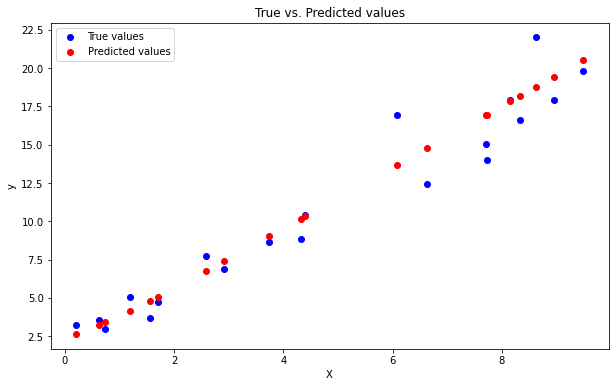

In [1]:


import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 生成示例数据集
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 2 * X + 1 + np.random.randn(100, 1) * 2

# 将数据分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 将目标变量转换为一维数组
y_train = y_train.ravel()
y_test = y_test.ravel()

# 创建一个MLPRegressor实例
regressor = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=1000, random_state=42)

# 训练模型
regressor.fit(X_train, y_train)

# 预测
y_pred = regressor.predict(X_test)

# 评估模型性能
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# 可视化训练数据和预测结果
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='True values')
plt.scatter(X_test, y_pred, color='red', label='Predicted values')
plt.xlabel('X')
plt.ylabel('y')
plt.title('True vs. Predicted values')
plt.legend()
plt.show()


## 【例9.2】MLPClassifier模型的示例代码。

Precision: 1.0
Recall: 1.0
F1 Score: 1.0


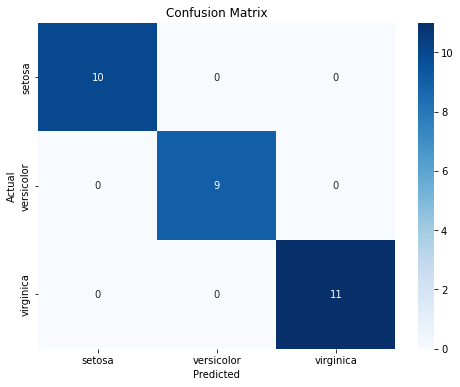

In [3]:


import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# 加载示例数据集
data = load_iris()
X = data.data
y = data.target

# 将数据分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建一个 MLPClassifier 实例
classifier = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000, random_state=42)

# 训练模型
classifier.fit(X_train, y_train)

# 预测
y_pred = classifier.predict(X_test)

# 计算混淆矩阵
cm = confusion_matrix(y_test, y_pred)

# 计算精确率、召回率和 F1 值
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# 打印评价指标
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


# 可视化混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


## 【例9.3】BernoulliRBM进行特征提取的示例代码。

Features shape: (1797, 64)


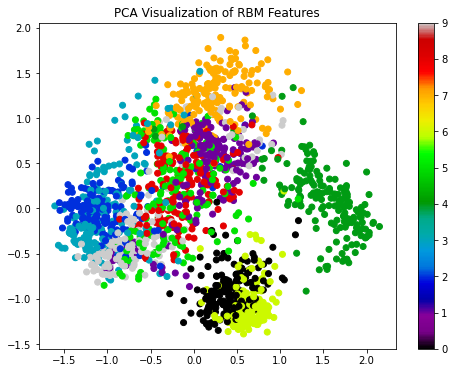

In [4]:

from sklearn.neural_network import BernoulliRBM
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA  # 新加入的PCA模块
import matplotlib.pyplot as plt

# 加载手写数字数据集
digits = load_digits()
X = digits.data
y = digits.target

# 数据预处理
X = MinMaxScaler().fit_transform(X)

# 定义BernoulliRBM模型，并设置参数
model = BernoulliRBM(n_components=64, learning_rate=0.01, n_iter=100)

# 训练模型
model.fit(X)

# 提取特征
X_features = model.transform(X)

# 输出特征矩阵的形状
print("Features shape:", X_features.shape)

# 使用PCA将特征可视化到2维空间
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_features)

# 绘制散点图
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.nipy_spectral)
plt.colorbar()
plt.title('PCA Visualization of RBM Features')
plt.show()
